In [213]:
#LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from scipy.stats import chi2_contingency

In [214]:
#CSV FILES

education=pd.read_csv('education.csv')
income=pd.read_csv('income.csv')
poverty=pd.read_csv('poverty.csv')
race=pd.read_csv('share_race_by_city.csv')
police_killing_test=pd.read_csv('police_killings_test.csv')
police_killing_train=pd.read_csv('police_killings_train.csv')


In [215]:
#CLEANING UP DATA WITH EMPTY/INVALID VALUES

police_killing_test.dropna(inplace=True)
police_killing_train.dropna(inplace=True)

#DISREGARDING INVALID VALUES
race=race[pd.to_numeric(race['share_white'],errors='coerce').notnull()]
race=race[pd.to_numeric(race['share_black'],errors='coerce').notnull()]
race=race[pd.to_numeric(race['share_native_american'],errors='coerce').notnull()]
race=race[pd.to_numeric(race['share_asian'],errors='coerce').notnull()]
race=race[pd.to_numeric(race['share_hispanic'],errors='coerce').notnull()]

In [216]:
#MERGING DATA

merged_data=pd.merge(education,income, on =['Geographic Area','City'])
merged_data=pd.merge(merged_data,poverty, on =['Geographic Area','City'])
race=race.rename(columns={'Geographic area':'Geographic Area'})
merged_data=pd.merge(merged_data,race, on =['Geographic Area','City'])
#display(HTML(merged_data.to_html()))

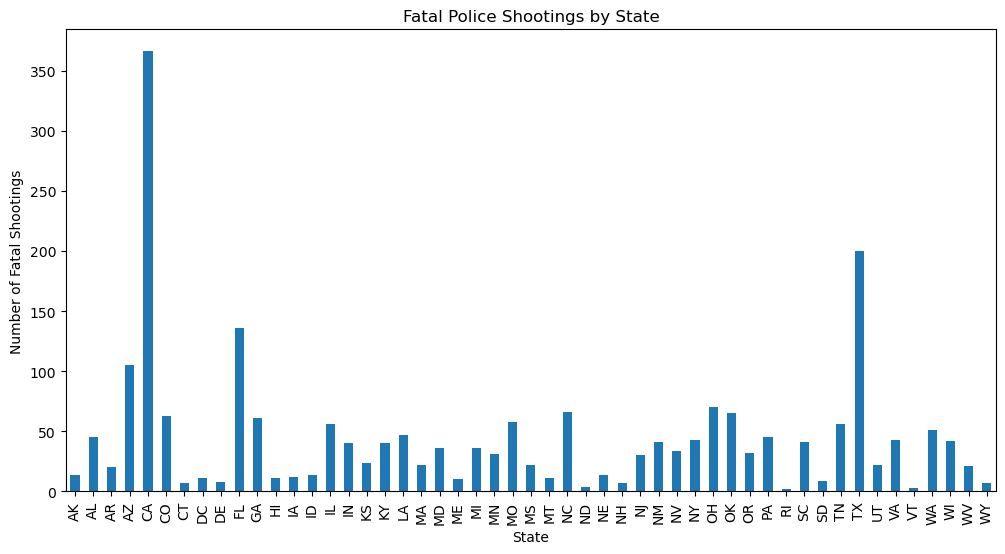

The state with the most fatal police shootings is CA with 366 fatal shootings.


In [217]:
#Which state has the most fatal police shootings?

state_counts_test = police_killing_test['state'].value_counts()
state_counts_train= police_killing_train['state'].value_counts()

state_counts=pd.concat([state_counts_test,state_counts_train],axis=0)
state_counts=state_counts.groupby(state_counts.index).sum()

plt.figure(figsize=(12,6))
state_counts.plot(kind='bar')
plt.title('Fatal Police Shootings by State')
plt.xlabel('State')
plt.ylabel('Number of Fatal Shootings')

plt.show()
most_fatal_state = state_counts.idxmax()
print(f'The state with the most fatal police shootings is {most_fatal_state} with {state_counts[most_fatal_state]} fatal shootings.')

In [218]:
#Which city is the most dangerous?

city_counts_test=police_killing_test['city'].value_counts()
city_counts_train=police_killing_train['city'].value_counts()

city_counts=pd.concat([city_counts_test,city_counts_train],axis=0)
city_counts=city_counts.groupby(city_counts.index).sum()

city_counts=city_counts.sort_values(ascending=False)
print("Top 5 most 'dangerous' cities according the number of fatalities:")
print(city_counts.head())



Top 5 most 'dangerous' cities according the number of fatalities:
Los Angeles    35
Phoenix        28
Houston        24
Chicago        22
Austin         18
Name: city, dtype: int64


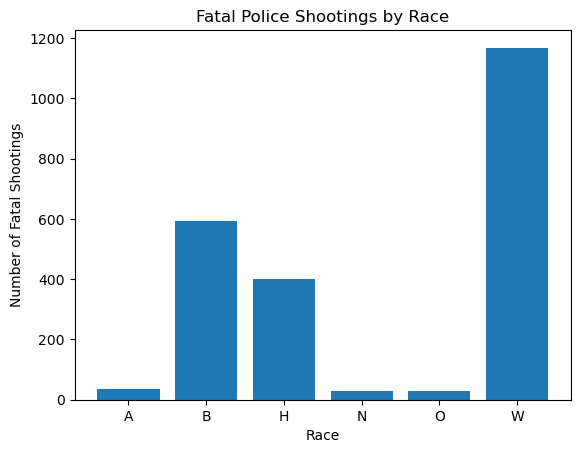

The most common race fatally shot by police is white


In [219]:
#Compare the total number of people killed per race.

total_killed_test=police_killing_test['race'].value_counts()
total_killed_train=police_killing_train['race'].value_counts()

total_killed=pd.concat([total_killed_test,total_killed_train],axis=0)
total_killed=total_killed.groupby(total_killed.index).sum().reset_index()
#print(total_killed)


plt.bar(total_killed['index'],total_killed['race'])
plt.title('Fatal Police Shootings by Race')
plt.xlabel('Race')
plt.ylabel('Number of Fatal Shootings')
plt.show()

print("The most common race fatally shot by police is white")

In [273]:
#Compare the number of people killed per race as a proportion of respective races.
police_killing_test_reduced = police_killing_test[['state', 'city', 'race']]
police_killing_train_reduce = police_killing_train[['state','city','race']]
merged_police_killing=pd.concat([police_killing_test_reduced,police_killing_train_reduce])
#print(merged_police_killing)


grouped=merged_police_killing.groupby(['state', 'city', 'race']).size().unstack(fill_value=0)

#print(grouped)
#display(HTML(grouped.to_html()))

#grouped.columns = ['white', 'black', 'native_american', 'asian','hispanic', 'other']
grouped.columns = ['asian', 'black', 'hispanic', 'native_american','other', 'white']
grouped = grouped.reset_index()
grouped=grouped.groupby('state').sum()
 
#print(grouped)

total=grouped.sum(axis=1)
percentages=grouped.apply(lambda x:round(x/total*100,1))
percentages=percentages.sort_values(by="state")
#print(percentages)



state_demographic=pd.DataFrame(columns=['state','asian','black','hispanic','native_american','white'])
current_state=race.iloc[0]['Geographic Area']
whiteMean=0.0
blackMean=0.0
naMean=0.0
asianMean=0.0
hispanicMean=0.0
lastIndex=-1
for index, row in race.iterrows():
    this_state=row['Geographic Area']
    if this_state!=current_state:
        n=index-lastIndex
        lastIndex=index
        state_demographic = pd.concat([state_demographic, pd.DataFrame({'state': current_state,
                                                                      'white': round((whiteMean/n),1),
                                                                      'black': round((blackMean/n),1),
                                                                      'native_american': round((naMean/n),1),
                                                                      'asian': round((asianMean/n),1),
                                                                      'hispanic': round((hispanicMean/n),1)}, index=[0])])
        state_demographic = state_demographic.reset_index(drop=True)
        whiteMean=float(row['share_white'])
        blackMean=float(row['share_black'])
        naMean=float(row['share_native_american'])
        asianMean=float(row['share_asian'])
        hispanicMean=float(row['share_hispanic'])
        
        current_state=this_state
        
    else:
        whiteMean+=float(row['share_white'])
        blackMean+=float(row['share_black'])
        naMean+=float(row['share_native_american'])
        asianMean+=float(row['share_asian'])
        hispanicMean+=float(row['share_hispanic'])

state_demographic=state_demographic.sort_values(by="state")
state_demographic.reset_index(drop=True, inplace=True)
#print(state_demographic)


#print(percentages.dtypes)
max_cols_percentages = percentages.idxmax(axis=1)
print("Most common race fatally shot in each state:")
print(max_cols_percentages)


state_demographic = state_demographic.reset_index(drop=True)
state_demographic.set_index("state", inplace=True)
#print(state_demographic.dtypes)
max_cols_state_demographic = state_demographic.idxmax(axis=1)
print("Most common race in each state")
print(max_cols_state_demographic)


#num_matches = (max_cols_demographic['race'] == max_cols_percentages['race']).sum()
set1 = set(max_cols_percentages)
set2 = set(max_cols_state_demographic)

intersection = len(set1.intersection(set2))
union = len(set1.union(set2))

jaccard_similarity = intersection/union
print("percentage similarity between the two data sets:",jaccard_similarity*100,"%")


Most common race fatally shot in each state:
state
AK              white
AL              white
AR              white
AZ              white
CA           hispanic
CO              white
CT              white
DC              black
DE              black
FL              white
GA              white
HI              other
IA              white
ID              white
IL              black
IN              white
KS              white
KY              white
LA              black
MA              white
MD              black
ME              white
MI              white
MN              white
MO              white
MS              white
MT              white
NC              white
ND    native_american
NE              white
NH              white
NJ              black
NM           hispanic
NV              white
NY              black
OH              white
OK              white
OR              white
PA              white
RI              black
SC              white
SD              white
TN              white
TX 